In [2]:
import numpy as np
import os
np.set_printoptions(threshold=np.inf, precision=4)
import matplotlib.pyplot as plt
import cv2

from skimage.transform import resize, pyramid_reduce
import sys
import time

# import from the eggnog_preprocessing repo
sys.path.append('../../eggnog_preprocessing/preprocessing/')
import read_videos_write_img_paf_hm as prep

from skimage import io

import av
import PIL

paf_pairs_indices = [[1, 14], [0, 1], [12, 0], [13, 0], 
                    [4, 14], [5, 4], [6, 5], [7, 6], [15, 7], [16, 6],
                    [8, 14], [9, 8], [10, 9], [11, 10], [17, 11], [18, 10],
                    [14, 2], [2, 3]
                    ]

In [3]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
#         plt.imshow(images[-1])
        plt.imshow(image, cmap=plt.get_cmap('gray'), alpha=1.0)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
#     print('np.array(fig.get_size_inches()) * n_images', np.array(fig.get_size_inches()) * n_images)
#     fig.set_size_inches([246, 164])
    plt.show()
    

In [5]:
# ## list directory of output transformed images
# transformed_dir = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r2/"

# tx_imgs = [im for im in sorted(os.listdir(transformed_dir)) if im.endswith('.jpg')]
# # print("tx_imgs len and [0]", len(tx_imgs), tx_imgs[0])

# image_idx = 53


# # original image 240x320
# # test_image_file_path = os.path.join(gt_raw_data_path, gt_file_pre + '_240x320.jpg')
# test_image_file_path = os.path.join(transformed_dir, tx_imgs[image_idx])
# # "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s07_1video_transformed_train/part1_layout_p14/20151116_230338_00_Video/20151116_230338_00_Video_vfr_90_skfr_90_240x320_transformed.jpg"
# print("test_image_file_path", test_image_file_path)

# original_image = cv2.imread(test_image_file_path)  # B,G,R order
# rgb_image = original_image[:,:,[2,1,0]]
# down_image = pyramid_reduce(rgb_image, downscale=8)

# print("original transformed rgb image =")
# plt.figure(0)
# plt.imshow(rgb_image)  
# plt.show()

# ### search the video for this image
# video_name = tx_imgs[image_idx].split('_vfr')[0]
# name_part2 = tx_imgs[image_idx].split('_vfr')[1].split('_')
# vfr = int(name_part2[1])
# skfr = int(name_part2[3])
# print("video_name, vfr, skfr =", video_name, vfr, skfr)


# print("=============================================")
# # search video_name in folder /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm
# dataset_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/"
# video_folder = "s04/part2_layout_p07/"  # "s04/part1_layout_p08/"
# video_path = os.path.join(dataset_path, video_folder, video_name + ".avi")

# video_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_v1/s04/part2_layout_p07/20151113_230303_00_Video.mp4"
# video_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video.avi"
video_path = '/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s18/part2_layouts_p35/20160129_195318_00_Video.avi'
print("video_file_path", video_path)
vfr = 50
print("vfr", vfr)

#1 original full image and original sk kp
xyz_skeleton_data, rgb_skeleton_data = prep.load_skeleton_data_for_video(video_path)
frame_dict = prep.load_frames_file(video_path)
vfr_time = frame_dict[vfr]
print("vfr_time", vfr_time)
print("len frame_dict", len(frame_dict.keys()))

print("rgb_skeleton_data", rgb_skeleton_data.shape, rgb_skeleton_data[..., 0].shape)
nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[vfr])
print("nearest_idx, nearest_time", nearest_idx, nearest_time)
# print("", rgb_skeleton_data[nearest_idx+1], rgb_skeleton_data[nearest_idx-1])

print("rgb nearest", nearest_time, nearest_idx, rgb_skeleton_data[nearest_idx])
rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,3))
print("rgb kp\n", rgb_kp)

rgb_kp = rgb_kp[:,1:]
print("rgb kp\n", rgb_kp)

# cap = cv2.VideoCapture(video_path)
# assert(cap.isOpened() == True)

# cap.set(cv2.CAP_PROP_POS_FRAMES, vfr)
# success, frame = cap.read()  # frame is read as (h, w, c)
# if success:
#     print("frame.shape", frame.shape)
#     img_full = frame[...,::-1]
#     img_central = img_full[:, 240:(1920-240), :]
#     print("original full rgb image =")
#     plt.figure()
#     plt.imshow(img_full)  
#     plt.show()
    
    

video_file_path /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s18/part2_layouts_p35/20160129_195318_00_Video.avi
vfr 50
xyz_skeleton_data.shape (347, 58)
rgb_skeleton_data.shape (347, 58)
total frames in the video = 351
vfr_time 19333333.0
len frame_dict 351
rgb_skeleton_data (347, 58) (347,)
nearest_idx, nearest_time 48 19292578.0
rgb nearest 19292578.0 48 [1.9293e+07 2.0000e+00 9.6730e+02 6.3300e+02 2.0000e+00 9.6632e+02
 4.7036e+02 2.0000e+00 9.6550e+02 2.9726e+02 2.0000e+00 9.9143e+02
 1.8961e+02 2.0000e+00 8.6957e+02 3.5530e+02 2.0000e+00 8.2076e+02
 4.9353e+02 2.0000e+00 8.6991e+02 5.7789e+02 2.0000e+00 9.0140e+02
 5.6997e+02 2.0000e+00 1.0714e+03 3.6461e+02 2.0000e+00 1.0870e+03
 5.1208e+02 2.0000e+00 1.0845e+03 6.3772e+02 2.0000e+00 1.0803e+03
 6.7161e+02 2.0000e+00 9.2168e+02 6.3484e+02 2.0000e+00 1.0164e+03
 6.2961e+02 2.0000e+00 9.6572e+02 3.4150e+02 2.0000e+00 9.3782e+02
 5.9119e+02 2.0000e+00 9.4004e+02 5.9831e+02 2.0000e+00 1.0849e+03
 7.1518e+02 2.0000e+00 1.0694e+03 6.68

reading video /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s18/part2_layouts_p35/20160129_195318_00_Video.avi
frame number (vfr) and rgb skeleton frame number 0 0
original full rgb image =


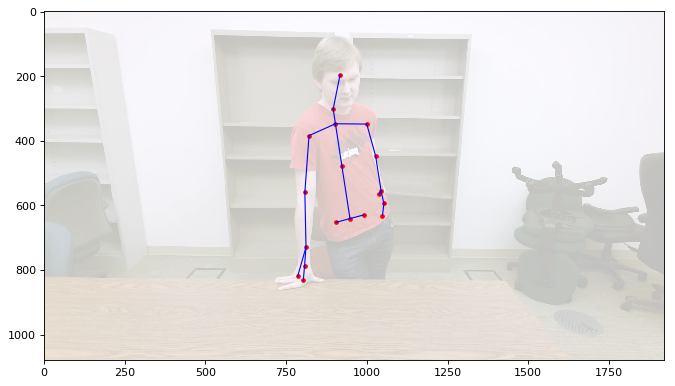

frame number (vfr) and rgb skeleton frame number 1 0
frame number (vfr) and rgb skeleton frame number 2 1
frame number (vfr) and rgb skeleton frame number 3 2
frame number (vfr) and rgb skeleton frame number 4 3
frame number (vfr) and rgb skeleton frame number 5 4
frame number (vfr) and rgb skeleton frame number 6 5
frame number (vfr) and rgb skeleton frame number 7 6
frame number (vfr) and rgb skeleton frame number 8 7
frame number (vfr) and rgb skeleton frame number 9 8
frame number (vfr) and rgb skeleton frame number 10 9
frame number (vfr) and rgb skeleton frame number 11 10
frame number (vfr) and rgb skeleton frame number 12 11
frame number (vfr) and rgb skeleton frame number 13 12
frame number (vfr) and rgb skeleton frame number 14 13
frame number (vfr) and rgb skeleton frame number 15 14
frame number (vfr) and rgb skeleton frame number 16 16
frame number (vfr) and rgb skeleton frame number 17 16
frame number (vfr) and rgb skeleton frame number 18 17
frame number (vfr) and rgb sk

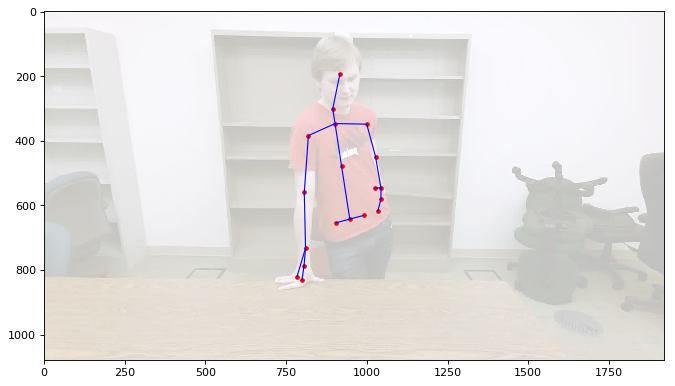

frame number (vfr) and rgb skeleton frame number 31 29
frame number (vfr) and rgb skeleton frame number 32 30
frame number (vfr) and rgb skeleton frame number 33 31
frame number (vfr) and rgb skeleton frame number 34 32
frame number (vfr) and rgb skeleton frame number 35 33
frame number (vfr) and rgb skeleton frame number 36 34
frame number (vfr) and rgb skeleton frame number 37 35
frame number (vfr) and rgb skeleton frame number 38 36
frame number (vfr) and rgb skeleton frame number 39 37
frame number (vfr) and rgb skeleton frame number 40 38
frame number (vfr) and rgb skeleton frame number 41 39
frame number (vfr) and rgb skeleton frame number 42 40
frame number (vfr) and rgb skeleton frame number 43 41
frame number (vfr) and rgb skeleton frame number 44 42
frame number (vfr) and rgb skeleton frame number 45 43
frame number (vfr) and rgb skeleton frame number 46 44
frame number (vfr) and rgb skeleton frame number 47 46
frame number (vfr) and rgb skeleton frame number 48 47
frame numb

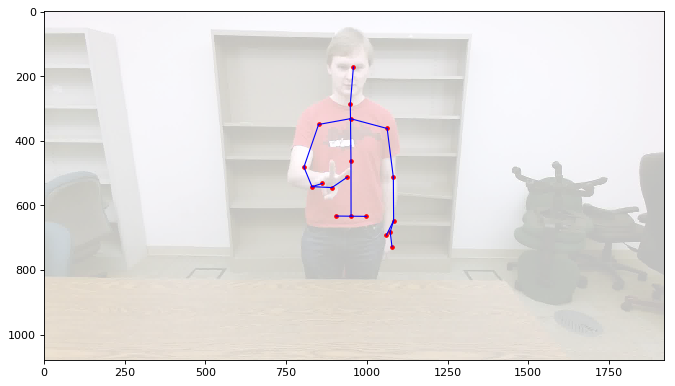

frame number (vfr) and rgb skeleton frame number 61 59
frame number (vfr) and rgb skeleton frame number 62 60
frame number (vfr) and rgb skeleton frame number 63 61
frame number (vfr) and rgb skeleton frame number 64 62
frame number (vfr) and rgb skeleton frame number 65 63
frame number (vfr) and rgb skeleton frame number 66 64
frame number (vfr) and rgb skeleton frame number 67 65
frame number (vfr) and rgb skeleton frame number 68 66
frame number (vfr) and rgb skeleton frame number 69 67
frame number (vfr) and rgb skeleton frame number 70 68
frame number (vfr) and rgb skeleton frame number 71 69
frame number (vfr) and rgb skeleton frame number 72 70
frame number (vfr) and rgb skeleton frame number 73 71
frame number (vfr) and rgb skeleton frame number 74 72
frame number (vfr) and rgb skeleton frame number 75 73
frame number (vfr) and rgb skeleton frame number 76 73
frame number (vfr) and rgb skeleton frame number 77 75
frame number (vfr) and rgb skeleton frame number 78 76
frame numb

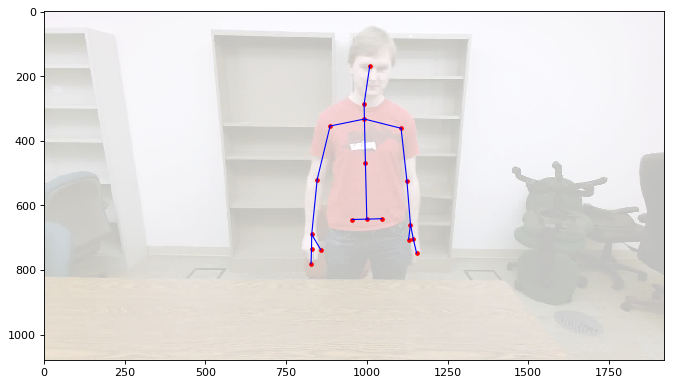

frame number (vfr) and rgb skeleton frame number 91 88
frame number (vfr) and rgb skeleton frame number 92 89
frame number (vfr) and rgb skeleton frame number 93 90
frame number (vfr) and rgb skeleton frame number 94 91
frame number (vfr) and rgb skeleton frame number 95 92
frame number (vfr) and rgb skeleton frame number 96 93
frame number (vfr) and rgb skeleton frame number 97 94
frame number (vfr) and rgb skeleton frame number 98 95
frame number (vfr) and rgb skeleton frame number 99 96
frame number (vfr) and rgb skeleton frame number 100 96
frame number (vfr) and rgb skeleton frame number 101 98
frame number (vfr) and rgb skeleton frame number 102 99
frame number (vfr) and rgb skeleton frame number 103 100
frame number (vfr) and rgb skeleton frame number 104 101
frame number (vfr) and rgb skeleton frame number 105 102
frame number (vfr) and rgb skeleton frame number 106 103
frame number (vfr) and rgb skeleton frame number 107 104
frame number (vfr) and rgb skeleton frame number 108

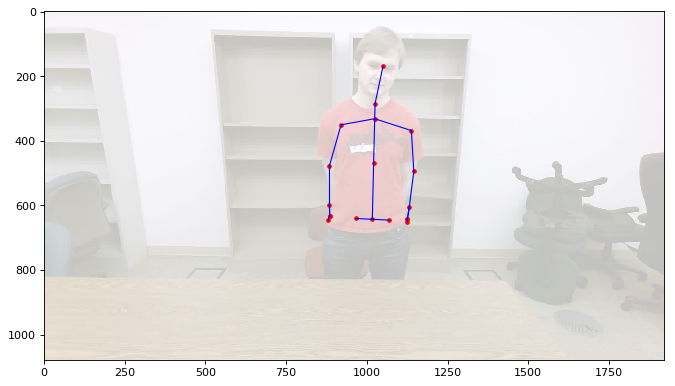

frame number (vfr) and rgb skeleton frame number 121 118
frame number (vfr) and rgb skeleton frame number 122 119
frame number (vfr) and rgb skeleton frame number 123 120
frame number (vfr) and rgb skeleton frame number 124 121
frame number (vfr) and rgb skeleton frame number 125 122
frame number (vfr) and rgb skeleton frame number 126 123
frame number (vfr) and rgb skeleton frame number 127 124
frame number (vfr) and rgb skeleton frame number 128 125
frame number (vfr) and rgb skeleton frame number 129 126
frame number (vfr) and rgb skeleton frame number 130 127
frame number (vfr) and rgb skeleton frame number 131 128
frame number (vfr) and rgb skeleton frame number 132 129
frame number (vfr) and rgb skeleton frame number 133 130
frame number (vfr) and rgb skeleton frame number 134 131
frame number (vfr) and rgb skeleton frame number 135 132
frame number (vfr) and rgb skeleton frame number 136 133
frame number (vfr) and rgb skeleton frame number 137 134
frame number (vfr) and rgb skel

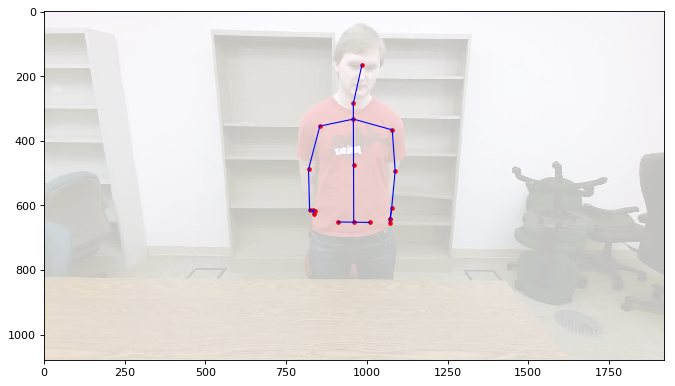

frame number (vfr) and rgb skeleton frame number 151 147
frame number (vfr) and rgb skeleton frame number 152 148
frame number (vfr) and rgb skeleton frame number 153 149
frame number (vfr) and rgb skeleton frame number 154 150
frame number (vfr) and rgb skeleton frame number 155 151
frame number (vfr) and rgb skeleton frame number 156 152
frame number (vfr) and rgb skeleton frame number 157 153
frame number (vfr) and rgb skeleton frame number 158 154
frame number (vfr) and rgb skeleton frame number 159 154
frame number (vfr) and rgb skeleton frame number 160 155
frame number (vfr) and rgb skeleton frame number 161 156
frame number (vfr) and rgb skeleton frame number 162 157
frame number (vfr) and rgb skeleton frame number 163 158
frame number (vfr) and rgb skeleton frame number 164 159
frame number (vfr) and rgb skeleton frame number 165 160
frame number (vfr) and rgb skeleton frame number 166 161
frame number (vfr) and rgb skeleton frame number 167 162
frame number (vfr) and rgb skel

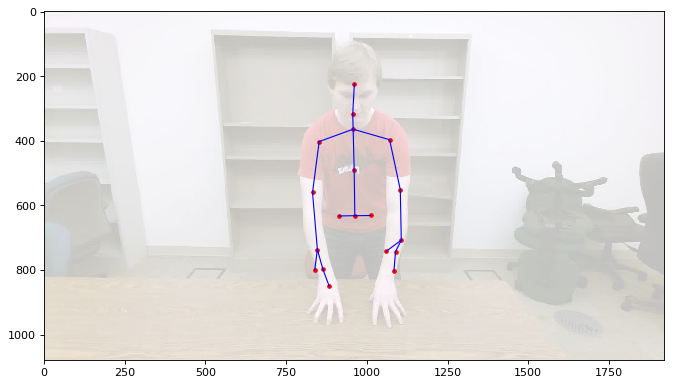

frame number (vfr) and rgb skeleton frame number 181 175
frame number (vfr) and rgb skeleton frame number 182 177
frame number (vfr) and rgb skeleton frame number 183 178
frame number (vfr) and rgb skeleton frame number 184 179
frame number (vfr) and rgb skeleton frame number 185 180
frame number (vfr) and rgb skeleton frame number 186 181
frame number (vfr) and rgb skeleton frame number 187 182
frame number (vfr) and rgb skeleton frame number 188 183
frame number (vfr) and rgb skeleton frame number 189 184
frame number (vfr) and rgb skeleton frame number 190 184
frame number (vfr) and rgb skeleton frame number 191 186
frame number (vfr) and rgb skeleton frame number 192 187
frame number (vfr) and rgb skeleton frame number 193 188
frame number (vfr) and rgb skeleton frame number 194 189
frame number (vfr) and rgb skeleton frame number 195 190
frame number (vfr) and rgb skeleton frame number 196 190
frame number (vfr) and rgb skeleton frame number 197 191
frame number (vfr) and rgb skel

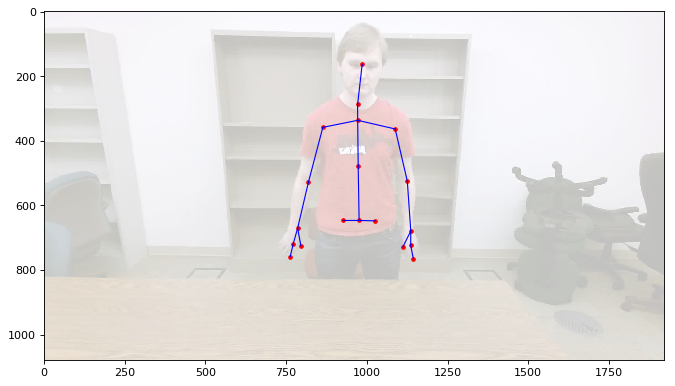

frame number (vfr) and rgb skeleton frame number 211 207
frame number (vfr) and rgb skeleton frame number 212 207
frame number (vfr) and rgb skeleton frame number 213 208
frame number (vfr) and rgb skeleton frame number 214 209
frame number (vfr) and rgb skeleton frame number 215 210
frame number (vfr) and rgb skeleton frame number 216 211
frame number (vfr) and rgb skeleton frame number 217 212
frame number (vfr) and rgb skeleton frame number 218 213
frame number (vfr) and rgb skeleton frame number 219 214
frame number (vfr) and rgb skeleton frame number 220 214
frame number (vfr) and rgb skeleton frame number 221 215
frame number (vfr) and rgb skeleton frame number 222 216
frame number (vfr) and rgb skeleton frame number 223 217
frame number (vfr) and rgb skeleton frame number 224 218
frame number (vfr) and rgb skeleton frame number 225 220
frame number (vfr) and rgb skeleton frame number 226 221
frame number (vfr) and rgb skeleton frame number 227 222
frame number (vfr) and rgb skel

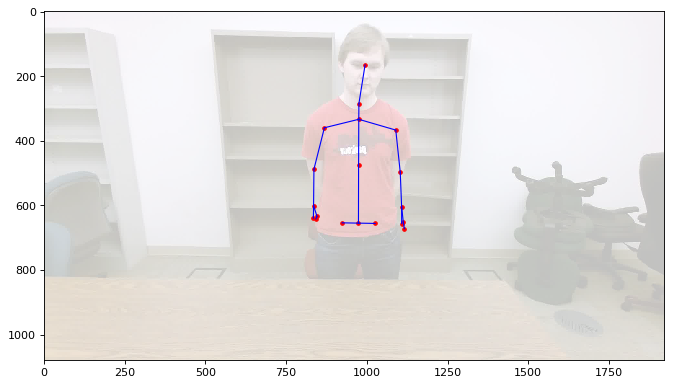

frame number (vfr) and rgb skeleton frame number 241 236
frame number (vfr) and rgb skeleton frame number 242 236
frame number (vfr) and rgb skeleton frame number 243 237
frame number (vfr) and rgb skeleton frame number 244 239
frame number (vfr) and rgb skeleton frame number 245 240
frame number (vfr) and rgb skeleton frame number 246 241
frame number (vfr) and rgb skeleton frame number 247 242
frame number (vfr) and rgb skeleton frame number 248 243
frame number (vfr) and rgb skeleton frame number 249 244
frame number (vfr) and rgb skeleton frame number 250 244
frame number (vfr) and rgb skeleton frame number 251 246
frame number (vfr) and rgb skeleton frame number 252 247
frame number (vfr) and rgb skeleton frame number 253 248
frame number (vfr) and rgb skeleton frame number 254 249
frame number (vfr) and rgb skeleton frame number 255 250
frame number (vfr) and rgb skeleton frame number 256 250
frame number (vfr) and rgb skeleton frame number 257 252
frame number (vfr) and rgb skel

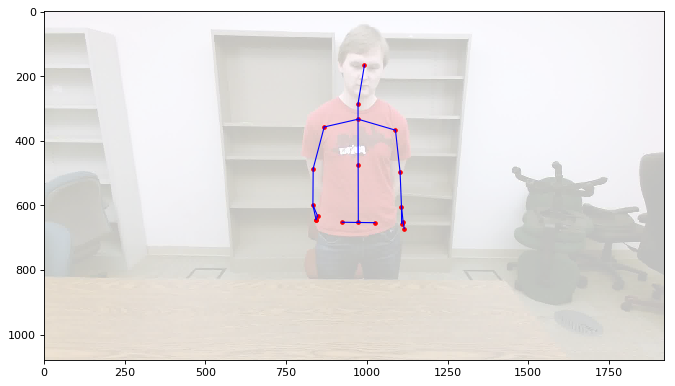

frame number (vfr) and rgb skeleton frame number 271 266
frame number (vfr) and rgb skeleton frame number 272 267
frame number (vfr) and rgb skeleton frame number 273 268
frame number (vfr) and rgb skeleton frame number 274 269
frame number (vfr) and rgb skeleton frame number 275 270
frame number (vfr) and rgb skeleton frame number 276 271
frame number (vfr) and rgb skeleton frame number 277 272
frame number (vfr) and rgb skeleton frame number 278 273
frame number (vfr) and rgb skeleton frame number 279 274
frame number (vfr) and rgb skeleton frame number 280 275
frame number (vfr) and rgb skeleton frame number 281 276
frame number (vfr) and rgb skeleton frame number 282 277
frame number (vfr) and rgb skeleton frame number 283 278
frame number (vfr) and rgb skeleton frame number 284 279
frame number (vfr) and rgb skeleton frame number 285 280
frame number (vfr) and rgb skeleton frame number 286 281
frame number (vfr) and rgb skeleton frame number 287 282
frame number (vfr) and rgb skel

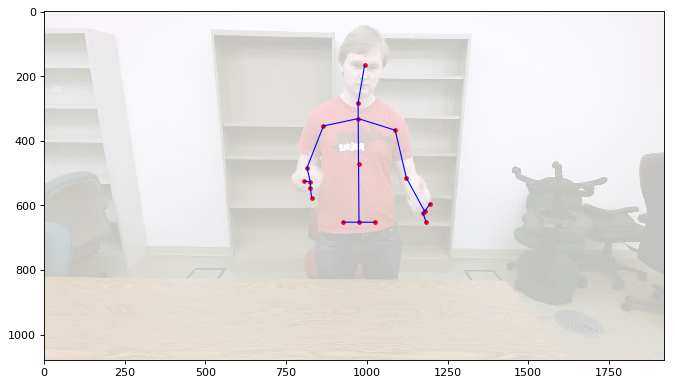

frame number (vfr) and rgb skeleton frame number 301 296
frame number (vfr) and rgb skeleton frame number 302 296
frame number (vfr) and rgb skeleton frame number 303 297
frame number (vfr) and rgb skeleton frame number 304 298
frame number (vfr) and rgb skeleton frame number 305 299
frame number (vfr) and rgb skeleton frame number 306 300
frame number (vfr) and rgb skeleton frame number 307 301
frame number (vfr) and rgb skeleton frame number 308 302
frame number (vfr) and rgb skeleton frame number 309 303
frame number (vfr) and rgb skeleton frame number 310 304
frame number (vfr) and rgb skeleton frame number 311 305
frame number (vfr) and rgb skeleton frame number 312 306
frame number (vfr) and rgb skeleton frame number 313 307
frame number (vfr) and rgb skeleton frame number 314 307
frame number (vfr) and rgb skeleton frame number 315 308
frame number (vfr) and rgb skeleton frame number 316 310
frame number (vfr) and rgb skeleton frame number 317 311
frame number (vfr) and rgb skel

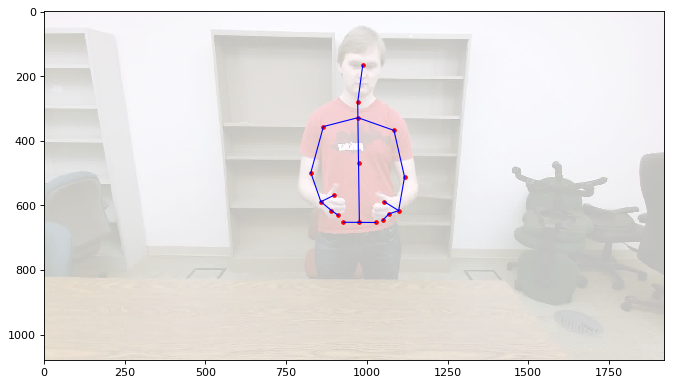

frame number (vfr) and rgb skeleton frame number 331 325
frame number (vfr) and rgb skeleton frame number 332 326
frame number (vfr) and rgb skeleton frame number 333 327
frame number (vfr) and rgb skeleton frame number 334 328
frame number (vfr) and rgb skeleton frame number 335 329
frame number (vfr) and rgb skeleton frame number 336 330
frame number (vfr) and rgb skeleton frame number 337 331
frame number (vfr) and rgb skeleton frame number 338 332
frame number (vfr) and rgb skeleton frame number 339 333
frame number (vfr) and rgb skeleton frame number 340 334
frame number (vfr) and rgb skeleton frame number 341 335
frame number (vfr) and rgb skeleton frame number 342 336
frame number (vfr) and rgb skeleton frame number 343 337
frame number (vfr) and rgb skeleton frame number 344 338
frame number (vfr) and rgb skeleton frame number 345 339
frame number (vfr) and rgb skeleton frame number 346 340
frame number (vfr) and rgb skeleton frame number 347 341
frame number (vfr) and rgb skel

In [6]:
### video visualization with pyav
print("reading video", video_path)

container = av.open(video_path)

for k, frame in enumerate(container.decode(video=0)):
    nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[k]) #
    print("frame number (vfr) and rgb skeleton frame number", k, nearest_idx)
    time.sleep(0.0)
    
    img_pil = frame.to_image()
    img_arr = np.asarray(img_pil)
    
    if (abs(frame_dict[k] - nearest_time) > 1000000):  # 100 ns ticks, so 1000000 = 0.1sec
        mismatch_count += 1
        print("THIS is a mismatch in time, of more than 0.1 sec")
        continue  # do not add the nearest found index if the difference is really big (>0.1sec)
    else:         
        # print(rgb_skeleton_data[nearest_idx])
        if(np.inf not in rgb_skeleton_data[nearest_idx]):  # do not add if there is np.inf in the line
            rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,3))[:,1:]
            
            if k%30==0:
                img_full = img_arr
                print("original full rgb image =")
                plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
                plt.imshow(img_full, alpha=0.25)
                plt.scatter(x=rgb_kp[...,0], y=rgb_kp[...,1], c='r', s=10)
                for p in paf_pairs_indices:
#                   print(p)
                    plt.plot([rgb_kp[p[0]][0], rgb_kp[p[1]][0]], [rgb_kp[p[0]][1], rgb_kp[p[1]][1]], 'b-', lw=1)
                plt.show()
                    

In [ ]:
### video visualization with opencv
print("reading video", video_path)

cap = cv2.VideoCapture(video_path)
assert(cap.isOpened() == True)
for k in frame_dict.keys():
    nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[k]) #
    print("frame number (vfr) and rgb skeleton frame number", k, nearest_idx)
    time.sleep(0.0)
    # input("press anything to continue")
    if (abs(frame_dict[k] - nearest_time) > 1000000):  # 100 ns ticks, so 1000000 = 0.1sec
        mismatch_count += 1
        print("THIS is a mismatch in time, of more than 0.1 sec")
        continue  # do not add the nearest found index if the difference is really big (>0.1sec)
    else:         
        # print(rgb_skeleton_data[nearest_idx])
        if(np.inf not in rgb_skeleton_data[nearest_idx]):  # do not add if there is np.inf in the line
            rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,3))[:,1:]
            cap.set(cv2.CAP_PROP_POS_FRAMES, k)
            success, frame = cap.read()  # frame is read as (h, w, c)
            if success and k%30==0:
                img_full = frame[...,::-1]
                print("original full rgb image =")
                plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
                plt.imshow(img_full, alpha=0.25)
                plt.scatter(x=rgb_kp[...,0], y=rgb_kp[...,1], c='r', s=10)
                for p in paf_pairs_indices:
#                   print(p)
                    plt.plot([rgb_kp[p[0]][0], rgb_kp[p[1]][0]], [rgb_kp[p[0]][1], rgb_kp[p[1]][1]], 'b-', lw=1)
                plt.show()
                    
                    

In [ ]:
### video visualization with pyav-genereted images
pyav_images_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s05/part1_layout_p10/20151114_014811_00_Video/"
video_name = pyav_images_path.split('/')[-2]
print("video_name", video_name)

for k in frame_dict.keys():
    nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[k]) #
    print("frame number (vfr) and rgb skeleton frame number", k, nearest_idx)
    time.sleep(0.0)
    # input("press anything to continue")
    if (abs(frame_dict[k] - nearest_time) > 1000000):  # 100 ns ticks, so 1000000 = 0.1sec
        mismatch_count += 1
        print("THIS is a mismatch in time, of more than 0.1 sec")
        continue  # do not add the nearest found index if the difference is really big (>0.1sec)
    else:         
        # print(rgb_skeleton_data[nearest_idx])
        if(np.inf not in rgb_skeleton_data[nearest_idx]):  # do not add if there is np.inf in the line
            rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,3))[:,1:]
            
#             frame_path = pyav_images_path + video_name + "_vfr_" + str(k) + "_skfr_00000_1920x1080.jpg"
            frame_path = pyav_images_path + video_name + "_vfr_" + str(k) + "_skfr_" + str(nearest_idx) + "_240x320.jpg"
            frame = io.imread(frame_path)
            
            
            if k%30==0:
                img_full = frame[...,::-1]
                img_full = resize(img_full, (1080, 1920))
                print("original full rgb image =")
                plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
                plt.imshow(img_full, alpha=0.25)
                plt.scatter(x=rgb_kp[...,0], y=rgb_kp[...,1], c='r', s=10)
                for p in paf_pairs_indices:
#                   print(p)
                    plt.plot([rgb_kp[p[0]][0], rgb_kp[p[1]][0]], [rgb_kp[p[0]][1], rgb_kp[p[1]][1]], 'b-', lw=1)
                plt.show()
                    
            
            
#### NEED TO COMPENSATE FOR left and right padding

In [20]:
k = 5500
cap = cv2.VideoCapture(video_path)
assert(cap.isOpened() == True)
print("k", k)
print("dict", len(frame_dict.keys()))
cap.set(cv2.CAP_PROP_POS_FRAMES, k)
success, frame = cap.read()
if success:
    print("frame.shape", frame.shape)
    img_full = frame[...,::-1]
    print("original full rgb image =")
    plt.figure()
    plt.imshow(img_full)  
    plt.show()
    
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("n_frames according to opencv", length)

"""
n_frames according to opencv 5548

mplayer gives the same number as opencv
/usr/local/mplayer/bin/mplayer /s/red/a/nobackup/cwc/data/userstudies/initial_study_xef/s04/part2_layout_p07/20151113_230303_00_Video.avi
A: 184.9 V: 184.9 A-V: -0.017 ct: -0.137 5548/5548 12%  0%  0.1% 0 0 
BUT
ffprobe gives:

rally-king:~/Desktop$ /s/parsons/h/proj/vision/usr/rahul/local/bin/ffprobe -v error -count_frames -select_streams v:0   -show_entries stream=nb_read_frames -of default=nokey=1:noprint_wrappers=1 /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s04/part2_layout_p07/20151113_230303_00_Video.avi 
4662

This number matches the number of lines in the .frames file.

"""

k 5500
dict 4662
n_frames according to opencv 4662


'\nn_frames according to opencv 5548\n\nmplayer gives the same number as opencv\n/usr/local/mplayer/bin/mplayer /s/red/a/nobackup/cwc/data/userstudies/initial_study_xef/s04/part2_layout_p07/20151113_230303_00_Video.avi\nA: 184.9 V: 184.9 A-V: -0.017 ct: -0.137 5548/5548 12%  0%  0.1% 0 0 \nBUT\nffprobe gives:\n\nrally-king:~/Desktop$ /s/parsons/h/proj/vision/usr/rahul/local/bin/ffprobe -v error -count_frames -select_streams v:0   -show_entries stream=nb_read_frames -of default=nokey=1:noprint_wrappers=1 /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s04/part2_layout_p07/20151113_230303_00_Video.avi \n4662\n\nThis number matches the number of lines in the .frames file.\n\n'